In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('emotion_dataset_raw.csv')
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [3]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

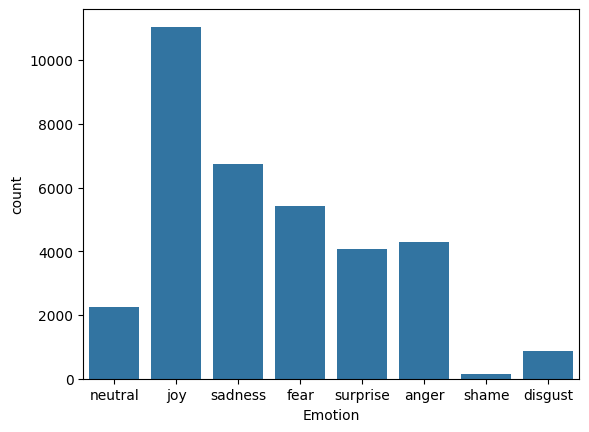

In [4]:
sns.countplot(x='Emotion',data=df)
plt.show()

In [5]:
import neattext as nfx
df['Clean_text'] = df['Text'].apply(nfx.remove_userhandles)

In [6]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_stopwords)

In [7]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_hashtags)


In [8]:
df

,Emotion,Text,Clean_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, YOU..."


In [9]:
x=df['Clean_text']
y=df['Emotion']

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier


In [12]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

e:\Projects\projectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6164974132975666

In [12]:
def accuracy_score(model):
     y_pred = model.predict(x_test)
     accuracy = metrics.accuracy_score(y_test, y_pred)
     print(f"Accuracy: {accuracy:.2f}")
     
     cm = metrics.confusion_matrix(y_test, y_pred)
    
     plt.figure(figsize=(8, 6))
     sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g', cbar=False)
     plt.xlabel('Predicted')
     plt.ylabel('True')
     plt.title('Confusion Matrix')
     plt.show()

Accuracy: 0.62


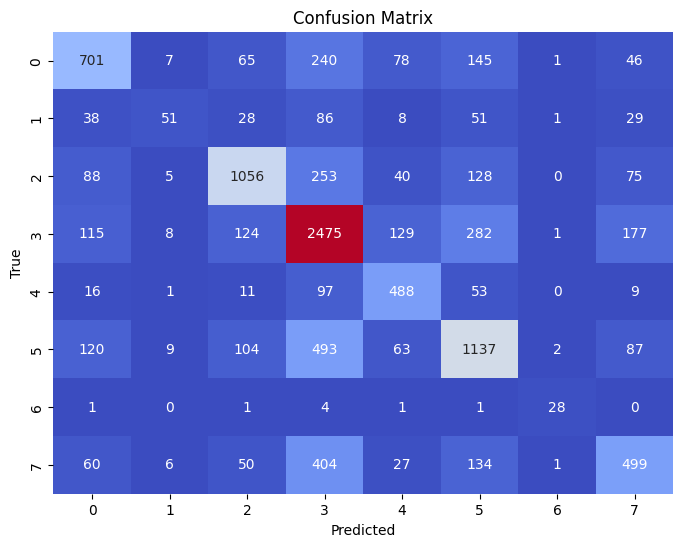

In [14]:
accuracy_score(pipe_lr)

In [15]:
pipe_svm = Pipeline(steps=[('cv',CountVectorizer()),('svc',SVC(kernel='rbf',C=10))])
pipe_svm.fit(x_train,y_train)
accuracy_score(pipe_svm)

Accuracy: 0.58


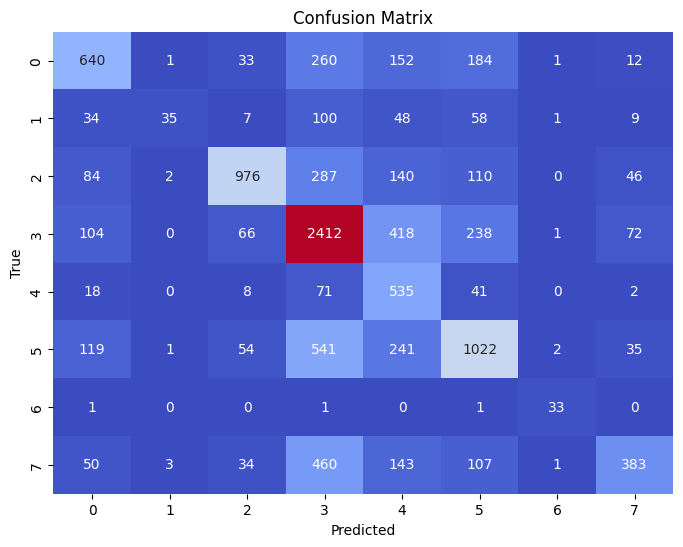

In [ ]:
pipe_rf = Pipeline(steps=[('cv',CountVectorizer()),('rf',RandomForestClassifier(n_estimators=100))])
pipe_rf.fit(x_train,y_train)
accuracy_score(pipe_rf)

Accuracy: 0.56


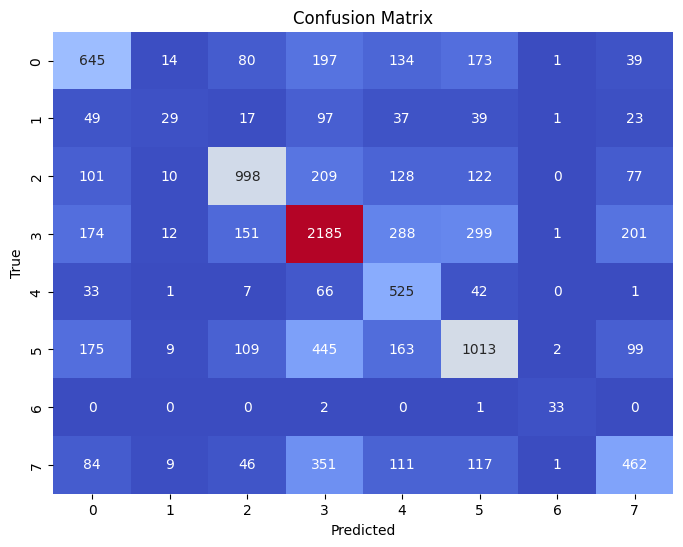

In [ ]:
poly_kernel_svm_clf = Pipeline([
    ('cv',CountVectorizer()),
    ('svm_clf',SVC(kernel='poly',degree=5,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(x_train,y_train)
accuracy_score(poly_kernel_svm_clf)

e:\Projects\projectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.62


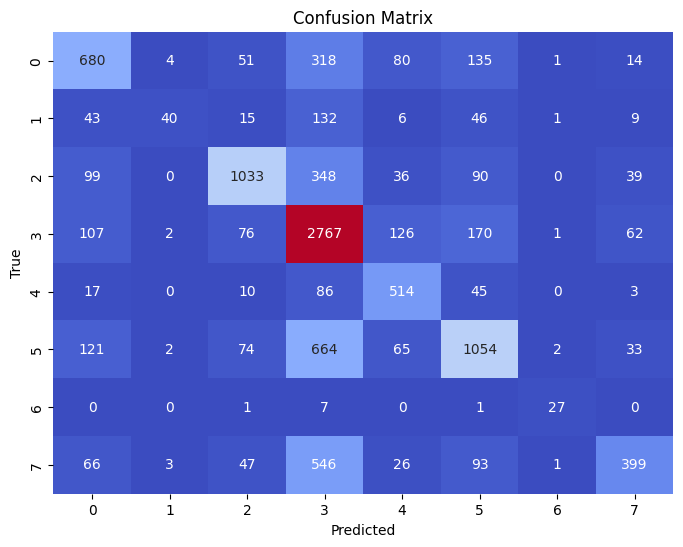

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
                              voting='hard')
voting_clf_pipe = Pipeline([
    ('cv',CountVectorizer()),
    ('voting_clf',voting_clf)
])
voting_clf_pipe.fit(x_train,y_train)
accuracy_score(voting_clf_pipe)

Accuracy: 0.20


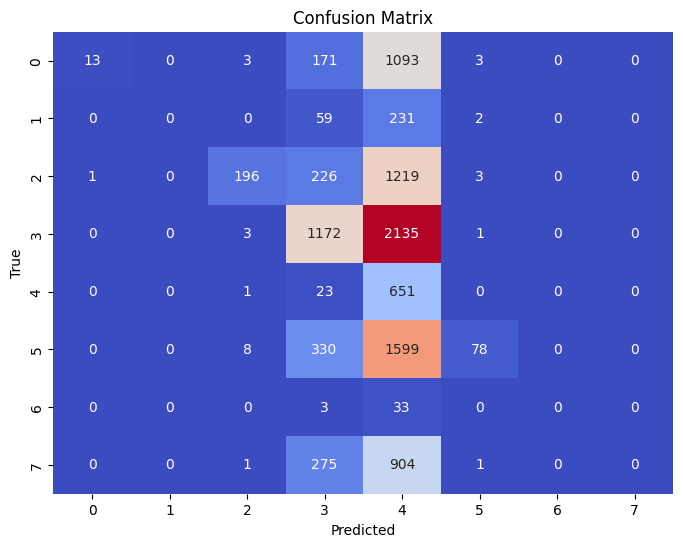

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=750,
    max_samples=100,bootstrap=True,n_jobs=-1
)
bag_clf_pipe = Pipeline([
    ('cv',CountVectorizer()),
    ('bag_clf',bag_clf)
])
bag_clf_pipe.fit(x_train,y_train)
accuracy_score(bag_clf_pipe)

In [ ]:
import pickle
pickle.dump(voting_clf_pipe,open('pipe.pkl','wb'))

In [ ]:
result=voting_clf_pipe.predict(["I am very sad about  the nature right now"])

In [ ]:
result[0]

'sadness'

Accuracy: 0.63


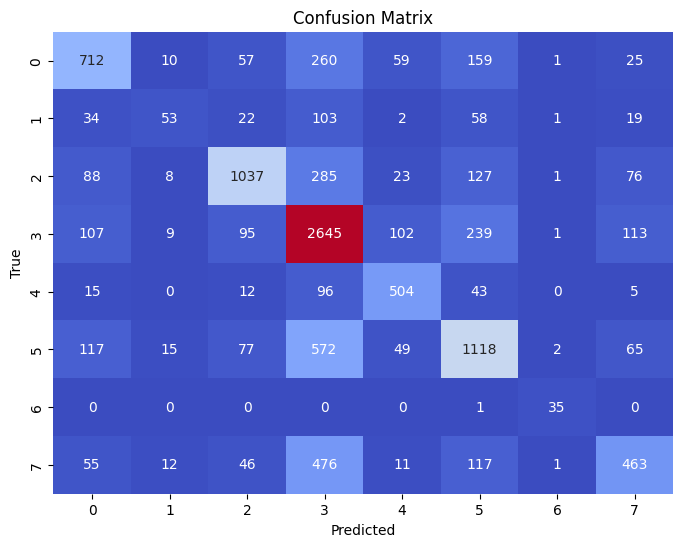

In [14]:
clf1 = LogisticRegression(class_weight='balanced',max_iter=1000, solver='saga')
clf2 = MultinomialNB()
clf3 = SVC(probability=True,class_weight='balanced') 

voting_clf_NB = VotingClassifier(estimators=[('lr', clf1),
    ('nb', clf2),
    ('svc', clf3)
], voting='soft')  
voting_clf_pipe_NB = Pipeline([
    ('cv',CountVectorizer()),
    ('voting_clf',voting_clf_NB)
])
voting_clf_pipe_NB.fit(x_train,y_train)
accuracy_score(voting_clf_pipe_NB)

In [16]:
import pickle
pickle.dump(voting_clf_pipe_NB,open('model.pkl','wb'))

e:\Projects\projectenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.59


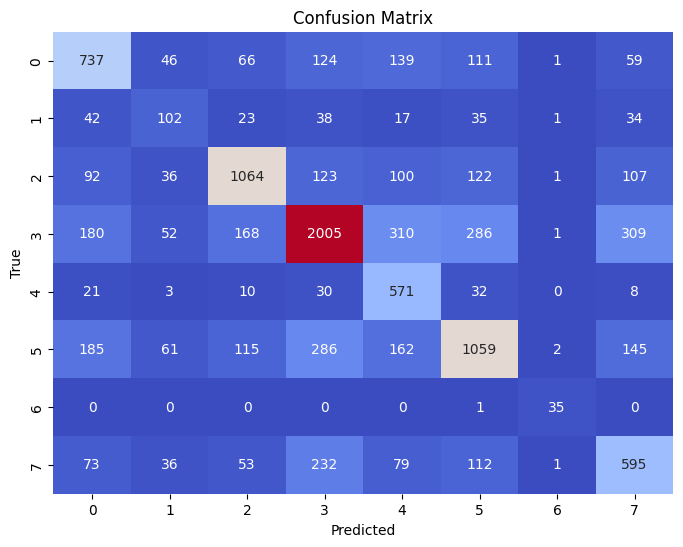

In [ ]:
pipe_lr_cus = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression(class_weight='balanced'))])
pipe_lr_cus.fit(x_train,y_train)

accuracy_score(pipe_lr_cus)


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

Accuracy: 0.34


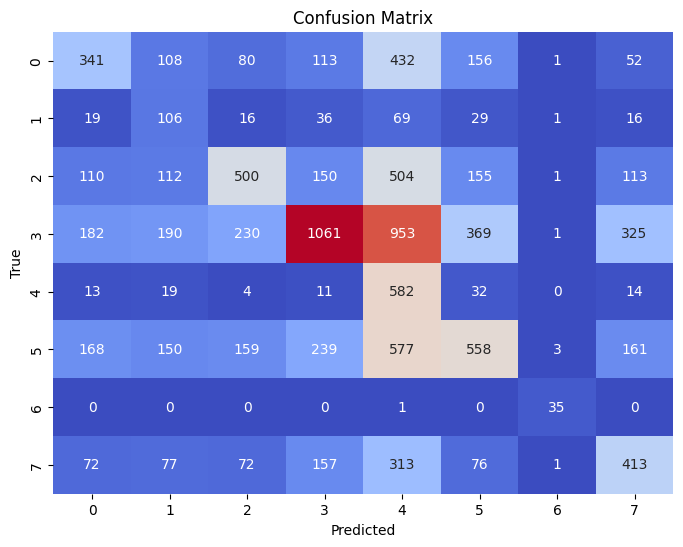

In [ ]:
undersample = RandomUnderSampler()

pipe_ibm_lr = ImbPipeline(steps=[
    ('cv', CountVectorizer()), 
    ('resample', undersample),  # or use undersample for undersampling
    ('lr', LogisticRegression(max_iter=1000, solver='saga'))
])
pipe_ibm_lr.fit(x_train, y_train)
accuracy_score(pipe_ibm_lr)


Accuracy: 0.38


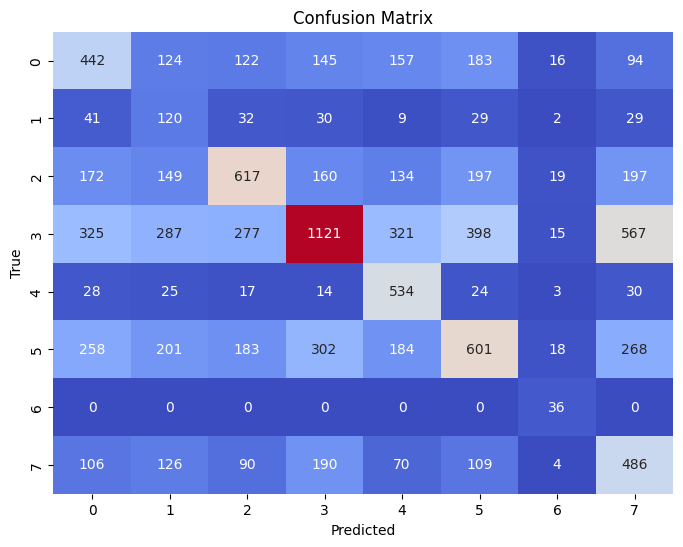

In [ ]:
clf1 = LogisticRegression(max_iter=1000, solver='saga')
clf2 = MultinomialNB()
clf3 = SVC(probability=True,class_weight='balanced') 

voting_clf_ibm_NB = VotingClassifier(estimators=[('lr', clf1),
    ('nb', clf2),
    ('svc', clf3)
], voting='soft')  
voting_clf_pipe_ibm_NB = ImbPipeline([
    ('cv',CountVectorizer()),
    ('resample', undersample), 
    ('voting_clf',voting_clf_ibm_NB)
])
voting_clf_pipe_ibm_NB.fit(x_train,y_train)
accuracy_score(voting_clf_pipe_ibm_NB)

Accuracy: 0.34


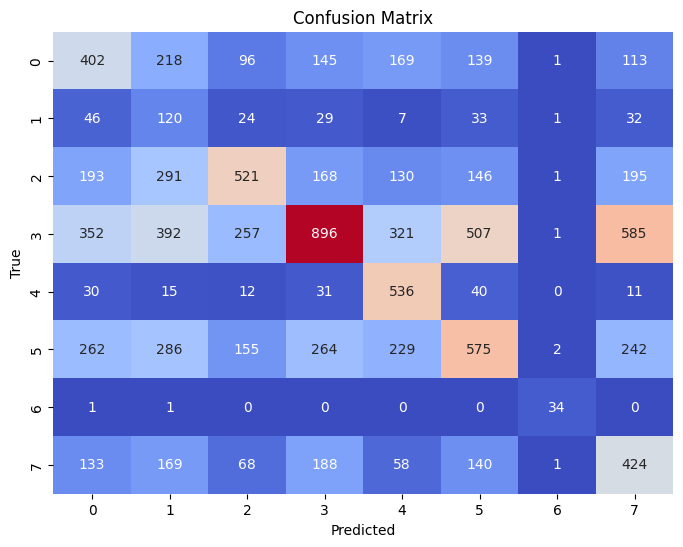

In [ ]:
pipe_ibm_svm = ImbPipeline(steps=[('cv',CountVectorizer()),('resample', undersample),('svc',SVC(kernel='rbf',C=10))])
pipe_ibm_svm.fit(x_train,y_train)
accuracy_score(pipe_ibm_svm)